In [97]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import PowerTransformer, StandardScaler
from typing import Tuple, Optional, Literal, List, Union
# from imblearn.combine import SMOTETomek
# from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 

### EDA

In [98]:
df = pd.read_csv('/Users/thobelasixpence/Documents/ml_zoomcamp_project/ml-zoomcamp-capstone/data/raw/train.csv')

In [99]:
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [100]:
df.shape

(103904, 25)

#### 1. Demographic Analysis

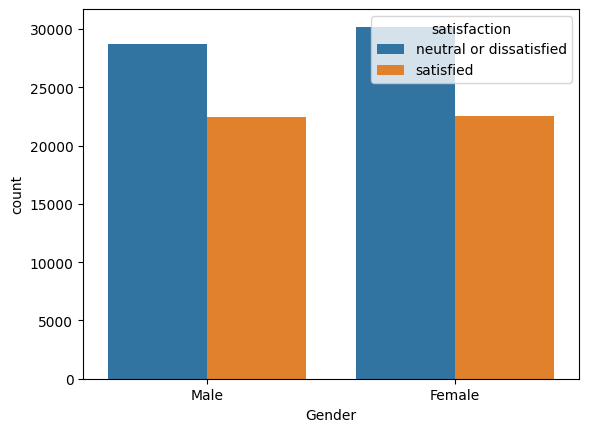

In [101]:
# how does satisfaction vary by gender?
sns.countplot(data=df, x='Gender', hue='satisfaction')
plt.show()

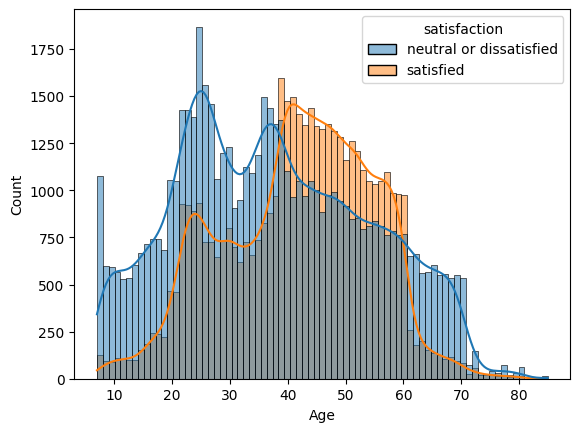

In [102]:
# What is the age distribution of satisfied vs. dissatisfied passengers?
sns.histplot(data=df, x='Age', hue='satisfaction', kde=True)
plt.show()

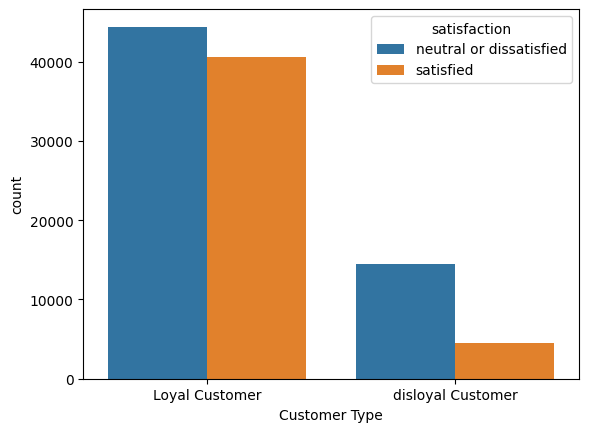

In [103]:
# Does customer type (Loyal vs. Disloyal) strongly correlate with satisfaction?
sns.countplot(data=df, x='Customer Type', hue='satisfaction')
plt.show()

#### 2. Travel characteristics

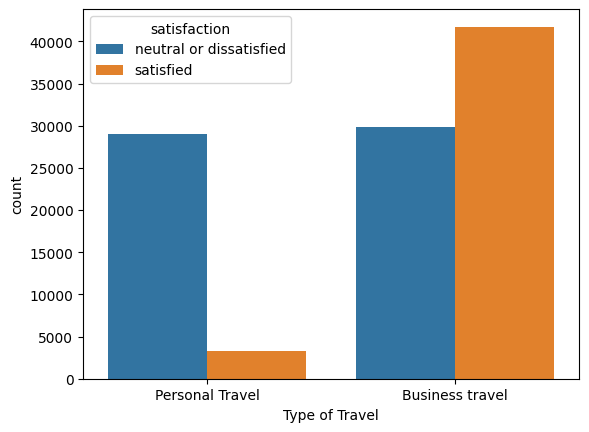

In [104]:
# what is the distribution of satisfaction by type of travel?
sns.countplot(data=df, x='Type of Travel', hue='satisfaction')
plt.show()

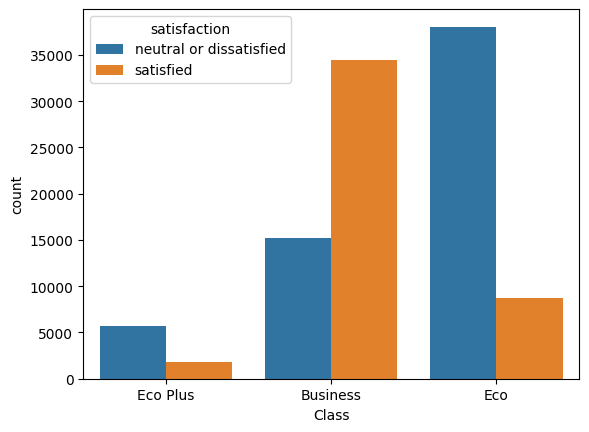

In [105]:
# does travel class (Business, Eco, Eco Plus) significantly affect satisfaction?
sns.countplot(data=df, x='Class', hue='satisfaction')
plt.show()


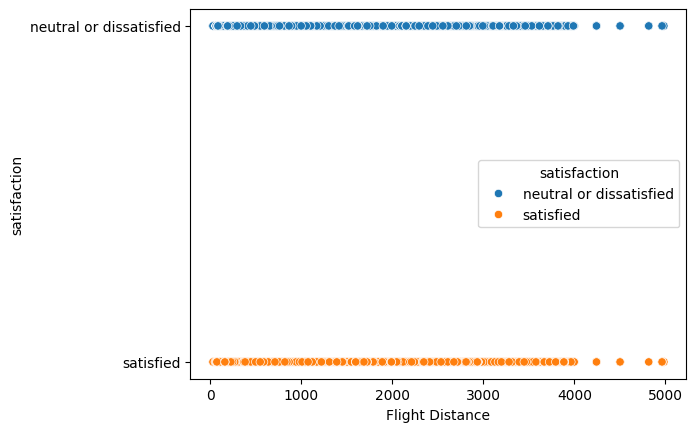

In [106]:
# How does flight distance correlate with satisfaction?
sns.scatterplot(data=df, x='Flight Distance', y='satisfaction', hue='satisfaction')
plt.show()

#### 3. Service satisfaction score

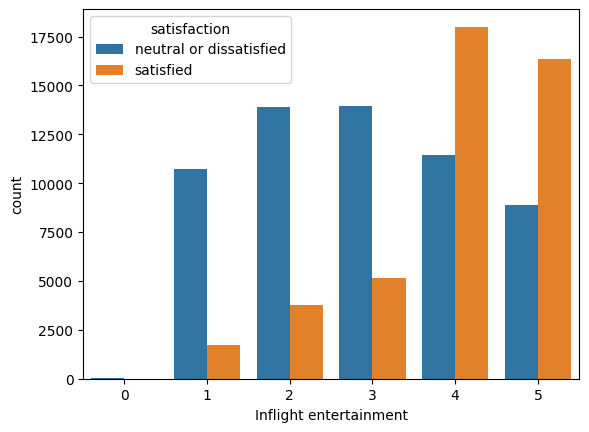

In [107]:
# Which service features are most correlated with passenger satisfaction?
# compare inflight entertainment vs satifaction
sns.countplot(data=df, x='Inflight entertainment', hue='satisfaction')
plt.show()

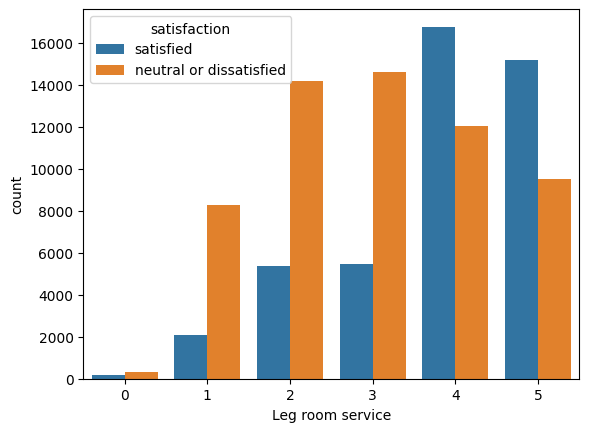

In [108]:
# compare legroom vs satifaction
sns.countplot(data=df, x='Leg room service', hue='satisfaction')
plt.show()

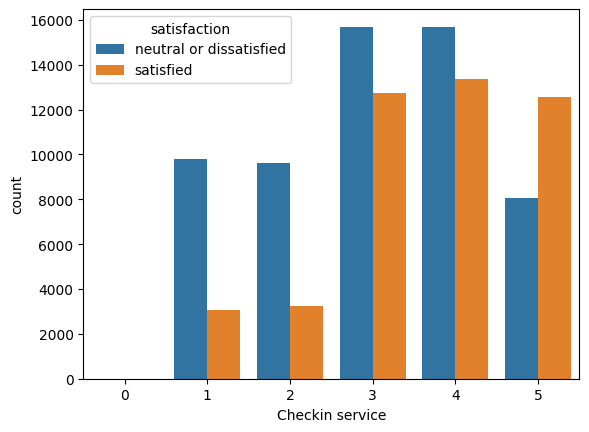

In [109]:
# Are there specific service features with very low average satisfaction scores?
# Checkin service vs satifaction
sns.countplot(data=df, x='Checkin service', hue='satisfaction')
plt.show()

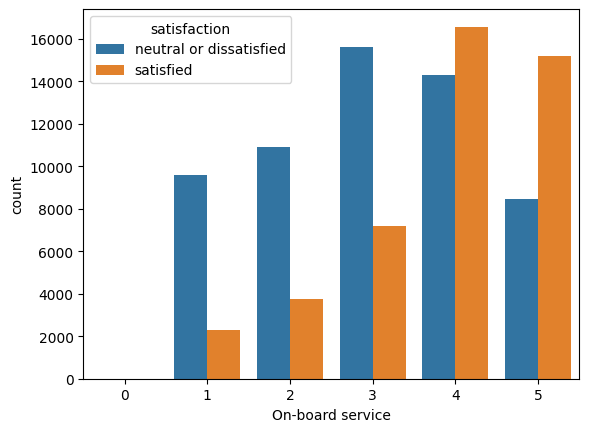

In [110]:
# Compare On-board service vs satifaction
sns.countplot(data=df, x='On-board service', hue='satisfaction')
plt.show()

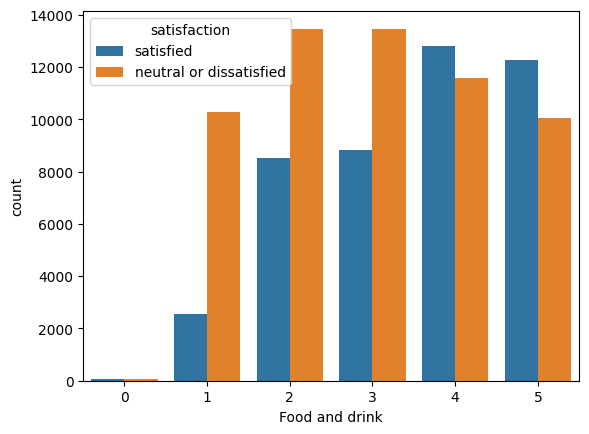

In [111]:
# compare Food and drink service vs satifaction
sns.countplot(data=df, x='Food and drink', hue='satisfaction')
plt.show()

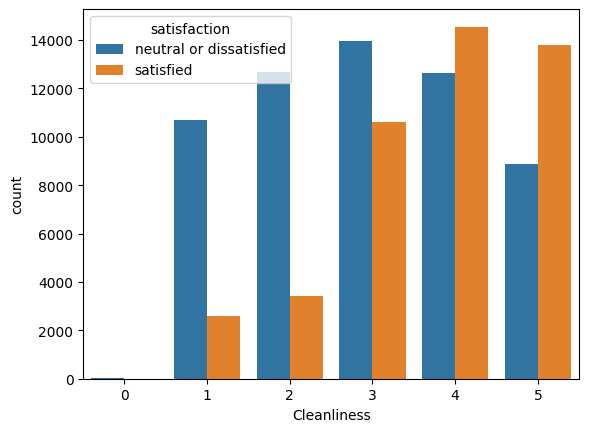

In [112]:
# compare Cleanliness vs satifaction
sns.countplot(data=df, x='Cleanliness', hue='satisfaction')
plt.show()

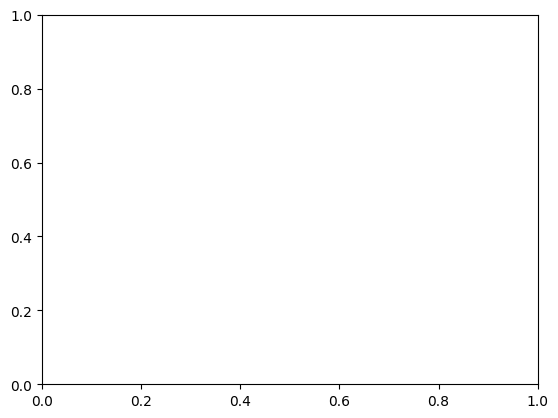

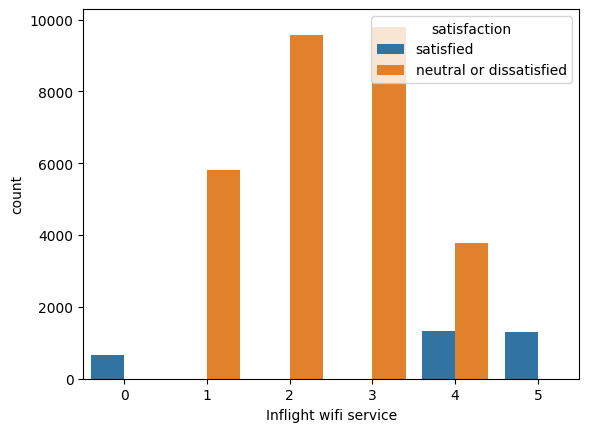

In [113]:
# Does inflight wifi service satisfaction correlate with satisfaction for business travelers more than personal travelers?
sns.countplot(data=df[df['Type of Travel']=='Business Travel'], x='Inflight wifi service', hue='satisfaction')
plt.show()
sns.countplot(data=df[df['Type of Travel']=='Personal Travel'], x='Inflight wifi service', hue='satisfaction')
plt.show()

#### 4. Comparitive analysis

In [114]:
# Which feature combinations lead to the highest satisfaction levels?


### Preprocessing

In [115]:
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [116]:
df.drop(columns='Unnamed: 0', axis=1, inplace=True)

In [117]:
df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [118]:
df['average_service_score'] = (df['Inflight wifi service'] + df['Food and drink'] + \
                                df['Seat comfort'] + df['Inflight entertainment'] + df['Cleanliness'] + \
                                df['Inflight service'] + df['Checkin service'] + \
                                df['Leg room service']) / 8

df['total_delay'] = df['Departure Delay in Minutes'] + df['Arrival Delay in Minutes']
df['average_delay_time'] = (df['Departure Delay in Minutes'] + df['Arrival Delay in Minutes']) / 2
df['delay_category'] = df['average_delay_time'].apply(lambda x: 'No Delay' if x <= 25 else ('Short Delay' if x <= 50 else ('Moderate Delay' if x <= 75 else 'Severe Delay')))
df['has_delay'] = df['total_delay'].apply(lambda x: 1 if x> 0.0 else 0) 

In [119]:
df['Gender'] = df['Gender'].astype('category')
df['Customer Type'] = df['Customer Type'].astype('category')
df['Type of Travel'] = df['Type of Travel'].astype('category')
df['Class'] = df['Class'].astype('category')
df['delay_category'] = df['delay_category'].astype('category')

In [120]:
for column in df.columns:
    if pd.api.types.is_object_dtype(df[column]):
        df[column] = df[column].astype(str)
    elif pd.api.types.is_numeric_dtype(df[column]):
        df[column] = pd.to_numeric(df[column], errors='coerce')
    elif pd.api.types.is_datetime64_dtype(df[column]):
        df[column] = pd.to_datetime(df[column])

In [121]:
duplicated = df[df.duplicated(keep=False)]
if duplicated.shape[0] > 0:
    df = df.drop_duplicates(inplace= True)
duplicated

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,average_service_score,total_delay,average_delay_time,delay_category,has_delay


In [122]:
features_with_na=[features for features in df.columns if df[features].isnull().sum()>0]
# features_with_na
for feature in features_with_na:
    if df[feature].dtype == 'category':
        df[feature].fillna(df[feature].mode()[0], inplace=True)
    else:
        df[feature].fillna(df[feature].mean())

In [123]:
features_with_na=[features for features in df.columns if df[features].isna().sum()>0]
features_with_na

['Arrival Delay in Minutes', 'total_delay', 'average_delay_time']

In [124]:
numeric_features = list(df.select_dtypes(include=['int64', 'float64']).columns)
numeric_features.pop(0)
numeric_features.pop(-1)
numeric_features

['Age',
 'Flight Distance',
 'Inflight wifi service',
 'Departure/Arrival time convenient',
 'Ease of Online booking',
 'Gate location',
 'Food and drink',
 'Online boarding',
 'Seat comfort',
 'Inflight entertainment',
 'On-board service',
 'Leg room service',
 'Baggage handling',
 'Checkin service',
 'Inflight service',
 'Cleanliness',
 'Departure Delay in Minutes',
 'Arrival Delay in Minutes',
 'average_service_score',
 'total_delay',
 'average_delay_time']

<Axes: ylabel='Flight Distance'>

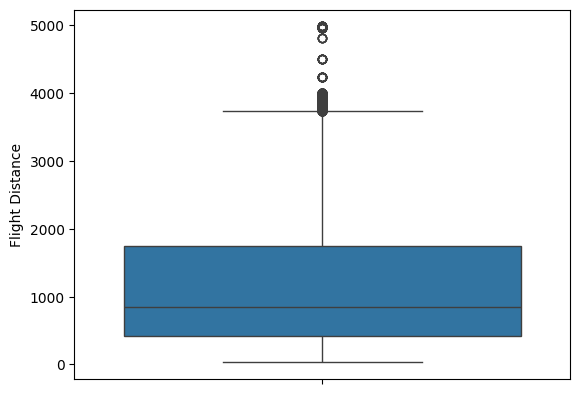

In [125]:
sns.boxplot(df['Flight Distance'])

<Axes: ylabel='Departure Delay in Minutes'>

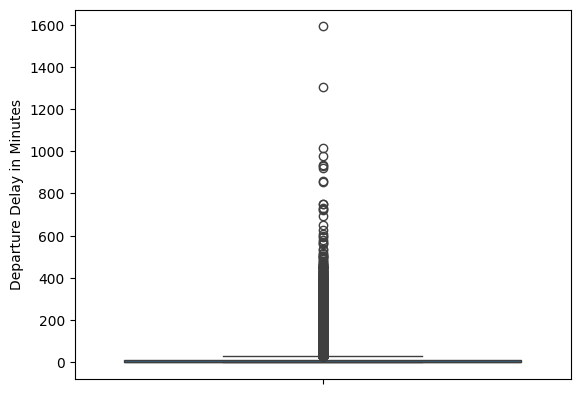

In [126]:
sns.boxplot(df['Departure Delay in Minutes'])

<Axes: ylabel='average_delay_time'>

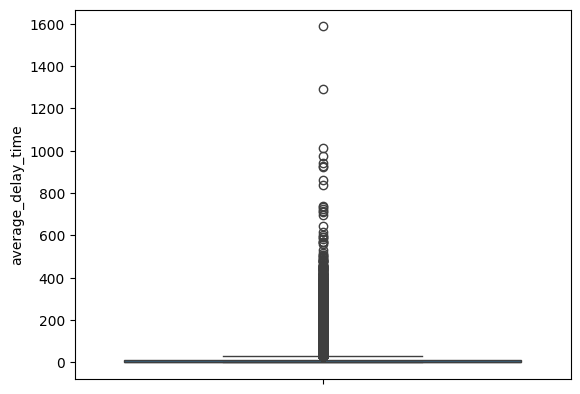

In [127]:
sns.boxplot(df['average_delay_time'])

In [128]:
numeric_features = list(df.select_dtypes(include=['int64', 'float64']).columns)
numeric_features.pop(0)
numeric_features.pop(-1)
for column in ['average_delay_time','total_delay', 'average_service_score', 'Departure Delay in Minutes', 'Flight Distance']:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    outlier = (df[column] < Q1 - 1.5 * IQR) | (df[column] > Q3 + 1.5 * IQR)
    df = df[~outlier]

<Axes: ylabel='Flight Distance'>

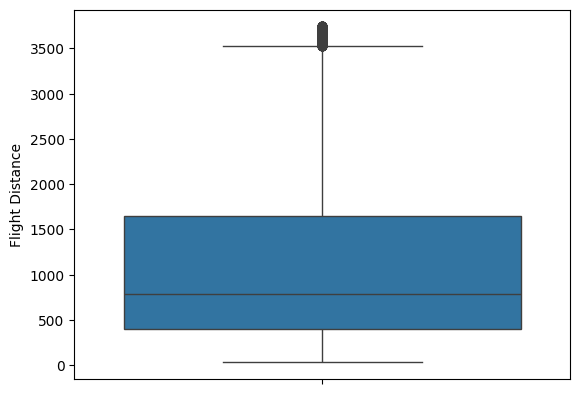

In [129]:
sns.boxplot(df['Flight Distance'])

<Axes: ylabel='Departure Delay in Minutes'>

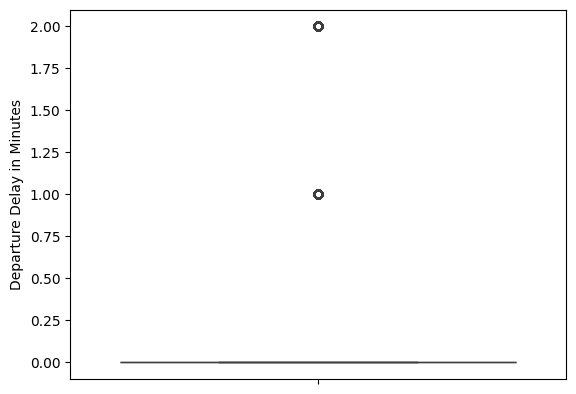

In [130]:
sns.boxplot(df['Departure Delay in Minutes'])

In [131]:
df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,average_service_score,total_delay,average_delay_time,delay_category,has_delay
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,4,1,1,6.0,neutral or dissatisfied,2.125,7.0,3.5,No Delay,1
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,4,5,0,0.0,satisfied,4.125,0.0,0.0,No Delay,0
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,0,0.0,satisfied,3.500,0.0,0.0,No Delay,0
5,111157,Female,Loyal Customer,26,Personal Travel,Eco,1180,3,4,2,...,4,1,0,0.0,neutral or dissatisfied,2.375,0.0,0.0,No Delay,0
8,79485,Female,Loyal Customer,41,Business travel,Business,853,1,2,2,...,1,2,0,0.0,neutral or dissatisfied,2.250,0.0,0.0,No Delay,0


In [132]:
def handling_categorical_types(df: pd.DataFrame)-> pd.DataFrame:
    df['Gender'] = df['Gender'].astype('category')
    df['Customer Type'] = df['Customer Type'].astype('category')
    df['Type of Travel'] = df['Type of Travel'].astype('category')
    df['Class'] = df['Class'].astype('category')
    df['delay_category'] = df['delay_category'].astype('category')
    return df

def handling_numeric_types(df:pd.DataFrame) -> pd.DataFrame:
    for column in df.columns:
        if pd.api.types.is_object_dtype(df[column]):
            df[column] = df[column].astype(str)
        elif pd.api.types.is_numeric_dtype(df[column]):
            df[column] = pd.to_numeric(df[column], errors='coerce')
        elif pd.api.types.is_datetime64_dtype(df[column]):
            df[column] = pd.to_datetime(df[column])
    return df

def drop_duplicates(df:pd.DataFrame)-> pd.DataFrame:
    duplicated = df[df.duplicated(keep=False)]
    if duplicated.shape[0] > 0:
        df = df.drop_duplicates(inplace= True)
    return df

def handle_missing_values(df:pd.DataFrame) -> pd.DataFrame:
    features_with_na=[features for features in df.columns if df[features].isnull().sum()>=1]
    for feature in features_with_na:
        if df[feature].dtype == 'categorical':
            df[feature].fillna(df[feature].mode()[0], inplace=True)
        else:
            df[feature].fillna(df[feature].mean())
    return df

def removing_outliers(df:pd.DataFrame) -> pd.DataFrame:
    for column in ['average_delay_time','total_delay', 'average_service_score', 'Departure Delay in Minutes', 'Flight Distance']:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        outlier = (df[column] < Q1 - 1.5 * IQR) | (df[column] > Q3 + 1.5 * IQR)
        df = df[~outlier]
    return df



### feature engineering

In [133]:
df['average_service_score'] = (df['Inflight wifi service'] + df['Food and drink'] + \
                                df['Seat comfort'] + df['Inflight entertainment'] + df['Cleanliness'] + \
                                df['Inflight service'] + df['Checkin service'] + \
                                df['Leg room service']) / 8

df['total_delay'] = df['Departure Delay in Minutes'] + df['Arrival Delay in Minutes']
df['average_delay_time'] = (df['Departure Delay in Minutes'] + df['Arrival Delay in Minutes']) / 2
df['delay_category'] = df['average_delay_time'].apply(lambda x: 'No Delay' if x <= 25 else ('Short Delay' if x <= 50 else ('Moderate Delay' if x <= 75 else 'Severe Delay')))
df['has_delay'] = df['total_delay'].apply(lambda x: 1 if x> 0.0 else 0) 

In [134]:
df

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,average_service_score,total_delay,average_delay_time,delay_category,has_delay
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,4,1,1,6.0,neutral or dissatisfied,2.125,7.0,3.5,No Delay,1
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,4,5,0,0.0,satisfied,4.125,0.0,0.0,No Delay,0
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,0,0.0,satisfied,3.500,0.0,0.0,No Delay,0
5,111157,Female,Loyal Customer,26,Personal Travel,Eco,1180,3,4,2,...,4,1,0,0.0,neutral or dissatisfied,2.375,0.0,0.0,No Delay,0
8,79485,Female,Loyal Customer,41,Business travel,Business,853,1,2,2,...,1,2,0,0.0,neutral or dissatisfied,2.250,0.0,0.0,No Delay,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103896,71445,Male,Loyal Customer,57,Business travel,Eco,867,4,5,5,...,3,4,0,0.0,neutral or dissatisfied,3.500,0.0,0.0,No Delay,0
103898,60666,Male,Loyal Customer,50,Personal Travel,Eco,1620,3,1,3,...,4,2,0,0.0,neutral or dissatisfied,2.500,0.0,0.0,No Delay,0
103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,...,5,4,0,0.0,satisfied,4.375,0.0,0.0,No Delay,0
103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,...,4,1,0,0.0,neutral or dissatisfied,2.375,0.0,0.0,No Delay,0


In [135]:
df['Type of Travel'].value_counts()

Type of Travel
Business travel    42091
Personal Travel    19629
Name: count, dtype: int64

In [136]:
42091 + 19629

61720

In [137]:
df['Customer Type'].value_counts()

Customer Type
Loyal Customer       50272
disloyal Customer    11448
Name: count, dtype: int64

In [138]:
df['Gender'].value_counts()

Gender
Female    31366
Male      30354
Name: count, dtype: int64

In [139]:
df['Class'].value_counts()

Class
Business    28857
Eco         28379
Eco Plus     4484
Name: count, dtype: int64

In [140]:
df['Gender'] = np.where(df['Gender'] == 'Male', 1, 0)
df['Customer Type'] = np.where(df['Customer Type'] == 'Loyal Customer', 1, 0)
df['Type of Travel'] = np.where(df['Type of Travel'] == 'Business Travel', 1, 0)
label_encode_class = { value: key for key, value in enumerate(df['Class'].unique())}
df['Class'] = df['Class'].map(label_encode_class)
label_encode_delay_category = {value: key for key, value in enumerate(df['delay_category'])}
df['delay_category'] = df['delay_category'].map(label_encode_delay_category)

In [141]:
X = df.drop(columns = 'satisfaction', axis= 1)
y = df['satisfaction']

In [142]:
df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,average_service_score,total_delay,average_delay_time,delay_category,has_delay
1,5047,1,0,25,0,0,235,3,2,3,...,4,1,1,6.0,neutral or dissatisfied,2.125,7.0,3.5,61719,1
2,110028,0,1,26,0,0,1142,2,2,2,...,4,5,0,0.0,satisfied,4.125,0.0,0.0,61719,0
4,119299,1,1,61,0,0,214,3,3,3,...,3,3,0,0.0,satisfied,3.500,0.0,0.0,61719,0
5,111157,0,1,26,0,1,1180,3,4,2,...,4,1,0,0.0,neutral or dissatisfied,2.375,0.0,0.0,61719,0
8,79485,0,1,41,0,0,853,1,2,2,...,1,2,0,0.0,neutral or dissatisfied,2.250,0.0,0.0,61719,0


In [143]:
df['Type of Travel'].value_counts()

Type of Travel
0    61720
Name: count, dtype: int64

In [144]:
df['Customer Type'].value_counts()

Customer Type
1    50272
0    11448
Name: count, dtype: int64

In [145]:
df['Gender'].value_counts()

Gender
0    31366
1    30354
Name: count, dtype: int64

In [146]:
df['Class'].value_counts()

Class
0    28857
1    28379
2     4484
Name: count, dtype: int64

In [147]:
corr_matrix = X.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
highly_corr_features = [column for column in upper.columns if any(upper[column] > 0.95)]
highly_corr_features
df.drop(columns='average_delay_time', axis=1, inplace=True)

<Axes: xlabel='count', ylabel='satisfaction'>

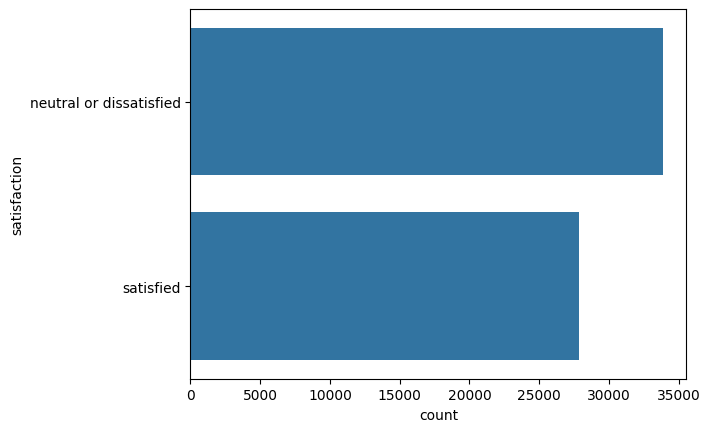

In [148]:
# checl if df is inbalance and fix it
sns.countplot(df['satisfaction'])

In [149]:
from src.utils.main_utils import CategoricalFeatureSelector
from time import time
start = time()
selector = CategoricalFeatureSelector(n_features=10)
X_selected = selector.fit_transform(X, y)
end = time()
print('{:.4f} s'.format(end-start))

/Users/thobelasixpence/Documents/ml_zoomcamp_project/ml-zoomcamp-capstone/ml-capstone-proj/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [ 4 26] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/thobelasixpence/Documents/ml_zoomcamp_project/ml-zoomcamp-capstone/ml-capstone-proj/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


7.2195 s


In [150]:
X_selected

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking
1,5047,1,0,25,0,0,235,3,2,3
2,110028,0,1,26,0,0,1142,2,2,2
4,119299,1,1,61,0,0,214,3,3,3
5,111157,0,1,26,0,1,1180,3,4,2
8,79485,0,1,41,0,0,853,1,2,2
...,...,...,...,...,...,...,...,...,...,...
103896,71445,1,1,57,0,1,867,4,5,5
103898,60666,1,1,50,0,1,1620,3,1,3
103900,73097,1,1,49,0,0,2347,4,4,4
103902,54173,0,0,22,0,1,1000,1,1,1


In [151]:
from sklearn.preprocessing import LabelEncoder

def feature_extraction(df: pd.DataFrame) -> pd.DataFrame:
    df['average_service_score'] = (df['Inflight wifi service'] + df['Food and drink'] + \
                                df['Seat comfort'] + df['Inflight entertainment'] + df['Cleanliness'] + \
                                df['Inflight service'] + df['Checkin service'] + \
                                df['Leg room service']) / 8

    df['total_delay'] = df['Departure Delay in Minutes'] + df['Arrival Delay in Minutes']
    df['average_delay_time'] = (df['Departure Delay in Minutes'] + df['Arrival Delay in Minutes']) / 2
    df['delay_category'] = df['average_delay_time'].apply(lambda x: 'No Delay' if x <= 25 else ('Short Delay' if x <= 50 else ('Moderate Delay' if x <= 75 else 'Severe Delay')))
    df['has_delay'] = df['total_delay'].apply(lambda x: 1 if x> 0.0 else 0)
    return df

def encode_categorical_features(df: pd.DataFrame) -> pd.DataFrame:
    df['Gender'] = np.where(df['Gender'] == 'Male', 1, 0)
    df['Customer Type'] = np.where(df['Customer Type'] == 'Loyal Customer', 1, 0)
    df['Type of Travel'] = np.where(df['Type of Travel'] == 'Business Travel', 1, 0)
    label_encode_class = { value: key for key, value in enumerate(df['Class'].unique())}
    df['Class'] = df['Class'].map(label_encode_class)
    label_encode_delay_category = {value: key for key, value in enumerate(df['delay_category'].unique())}
    df['delay_category'] = df['delay_category'].map(label_encode_delay_category)
    return df

def separate_dataset(df: pd.DataFrame)-> Tuple[pd.DataFrame, pd.Series]:
    X = df.drop(columns='satisfaction', axis= 1)
    y = df['satisfaction']
    return X, y

def drop_highly_correlated_features(df: pd.DataFrame) -> pd.DataFrame:
    corr_matrix = df.corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
    highly_corr_features = [column for column in upper.columns if any(upper[column] > 0.95)]
    df.drop(columns=highly_corr_features, axis=1, inplace=True)
    return df

def encode_target_feature(y: pd.Series) -> pd.Series:
    label_encoder = LabelEncoder()
    y  = label_encoder.fit_transform(y)
    return y

def feature_selection(df: pd.DataFrame)-> Tuple[pd.DataFrame, pd.Series]:
    X, y  = separate_dataset(df)
    y = encode_categorical_features(y)
    selector = CategoricalFeatureSelector(n_features=10)
    X_selected = selector.fit_transform(X, y)
    return X_selected, y

In [152]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y  = label_encoder.fit_transform(y)

In [153]:
y

array([0, 1, 1, ..., 1, 0, 0], shape=(61720,))

In [154]:
df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,average_service_score,total_delay,delay_category,has_delay
1,5047,1,0,25,0,0,235,3,2,3,...,1,4,1,1,6.0,neutral or dissatisfied,2.125,7.0,61719,1
2,110028,0,1,26,0,0,1142,2,2,2,...,4,4,5,0,0.0,satisfied,4.125,0.0,61719,0
4,119299,1,1,61,0,0,214,3,3,3,...,3,3,3,0,0.0,satisfied,3.500,0.0,61719,0
5,111157,0,1,26,0,1,1180,3,4,2,...,4,4,1,0,0.0,neutral or dissatisfied,2.375,0.0,61719,0
8,79485,0,1,41,0,0,853,1,2,2,...,4,1,2,0,0.0,neutral or dissatisfied,2.250,0.0,61719,0


In [155]:
# here let's make a categorical feature based on total delay where we say delay below 25% of total delay is no delay, below 50% is short delay, below 75% is moderate delay and above 75% is severe delay



In [156]:
X_train, X_val, y_train, y_val = train_test_split(X_selected, y,
                                                        test_size=0.25, random_state=42)

In [157]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2,
                                                                    random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val,
                                                        test_size=0.25, random_state=42)

In [158]:
X_train.shape, X_test.shape, X_val.shape,  y_train.shape, y_test.shape, y_val.shape

((37032, 28), (12344, 28), (12344, 28), (37032,), (12344,), (12344,))

### Model Training

In [159]:
X_selected

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking
1,5047,1,0,25,0,0,235,3,2,3
2,110028,0,1,26,0,0,1142,2,2,2
4,119299,1,1,61,0,0,214,3,3,3
5,111157,0,1,26,0,1,1180,3,4,2
8,79485,0,1,41,0,0,853,1,2,2
...,...,...,...,...,...,...,...,...,...,...
103896,71445,1,1,57,0,1,867,4,5,5
103898,60666,1,1,50,0,1,1620,3,1,3
103900,73097,1,1,49,0,0,2347,4,4,4
103902,54173,0,0,22,0,1,1000,1,1,1


In [160]:
ecluded_features = ['Type of Travel', 'Class', 'Customer Type', 'delay_category', 'has_delay']
scaling_cols = [col for col in X_selected.columns if col not in ecluded_features]
scaling_cols

['id',
 'Gender',
 'Age',
 'Flight Distance',
 'Inflight wifi service',
 'Departure/Arrival time convenient',
 'Ease of Online booking']

In [161]:
X_train[scaling_cols]

,id,Gender,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking
89615,24488,0,35,3236,3,3,3
62686,119720,0,59,1325,3,3,4
34461,56286,1,57,2227,2,2,2
10223,53126,1,14,2065,5,4,5
89472,42231,0,55,2817,2,4,4
...,...,...,...,...,...,...,...
93702,104692,1,53,1879,1,1,1
66226,67284,1,20,1121,1,5,0
44209,21562,1,41,399,4,1,1
18602,112189,0,60,895,4,4,4


In [50]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline, Pipeline
# exlude all the categorical features
ecluded_features = ['Type of Travel', 'Class', 'Customer Type', 'delay_category', 'has_delay']
scaling_cols = [col for col in X_selected.columns if col not in ecluded_features]
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[scaling_cols])
X_valid_scaled = scaler.transform(X_val[scaling_cols])

In [51]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.base import BaseEstimator
from typing import Union, Optional, Tuple, Any
# from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score
# def get_tree_based_models() -> list:
#     """Return a list of tree-based models."""
#     return [
#         RandomForestClassifier(),
#         GradientBoostingClassifier(),
#         CatBoostClassifier(),
#         XGBClassifier(),
#         LGBMClassifier()
#     ]

def get_ensemble_models() -> list:
    """Return a list of ensemble models."""
    return [
        RandomForestClassifier(n_estimators=100, random_state=42),
        GradientBoostingClassifier(n_estimators=100, random_state=42),
        # CatBoostClassifier(iterations=100, random_state=42),
        # XGBClassifier(n_estimators=100, random_state=42),
        LGBMClassifier(n_estimators=100, random_state=42)
    ]
model_accuracy ={}
models = []
for model in get_ensemble_models():
    model.fit(X_train_scaled, y_train)
    models.append(model)
    y_pred = model.predict(X_valid_scaled)
    print(f'Accuracy of {model.__class__.__name__}: {accuracy_score(y_val, y_pred)}')
    model_accuracy[model.__class__.__name__] = accuracy_score(y_val, y_pred)

Accuracy of RandomForestClassifier: 0.850696694750486
Accuracy of GradientBoostingClassifier: 0.8310110174983798
[LightGBM] [Info] Number of positive: 16790, number of negative: 20242
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000406 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 610
[LightGBM] [Info] Number of data points in the train set: 37032, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.453392 -> initscore=-0.186976
[LightGBM] [Info] Start training from score -0.186976
Accuracy of LGBMClassifier: 0.8503726506804925


In [52]:
model_accuracy.items()

dict_items([('RandomForestClassifier', 0.850696694750486), ('GradientBoostingClassifier', 0.8310110174983798), ('LGBMClassifier', 0.8503726506804925)])

In [53]:
for model in models:
    X_test_scaled = scaler.transform(X_test[scaling_cols])
    y_pred = model.predict(X_test_scaled)
    print(f'Accuracy of {model.__class__.__name__}: {accuracy_score(y_test, y_pred)}')
    model_accuracy[model.__class__.__name__] = accuracy_score(y_test, y_pred)

Accuracy of RandomForestClassifier: 0.8543421905379132
Accuracy of GradientBoostingClassifier: 0.8361957226182761
Accuracy of LGBMClassifier: 0.8559624108878807


In [54]:
model_accuracy

{'RandomForestClassifier': 0.8543421905379132,
 'GradientBoostingClassifier': 0.8361957226182761,
 'LGBMClassifier': 0.8559624108878807}

In [55]:
best_model = max(zip(model_accuracy.values(), model_accuracy.keys()))[1]
best_model

'LGBMClassifier'

In [56]:
wanted_model = [m for m in models if m.__class__.__name__ == best_model][0]


In [57]:
type(wanted_model)

lightgbm.sklearn.LGBMClassifier

In [ ]:
def split_dataset(df: pd.DataFrame, y: pd.Series) -> Tuple[pd.DataFrame, pd.DataFrame,
                                                           pd.Series, pd.Series]:
    X_train, X_val, y_train, y_val = train_test_split(df, y,
                                                        test_size=0.25, random_state=42)
    return X_train, X_val, y_train, y_val

def feature_scaling(X_train: pd.DataFrame, X_valid: pd.DataFrame) -> Tuple[
                                                                    Union[pd.DataFrame, np.ndarray],
                                                                    Union[pd.DataFrame, np.ndarray],
                                                                    StandardScaler]:
    ecluded_features = ['Type of Travel', 'Class', 'Customer Type', 'delay_category', 'has_delay']
    scaling_cols = [col for col in X_selected.columns if col not in ecluded_features]
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train[scaling_cols])
    X_valid_scaled = scaler.transform(X_val[scaling_cols])
    return X_train_scaled, X_valid_scaled, scaler

def get_ensemble_models() -> list:
    """Return a list of ensemble models."""
    return [
        RandomForestClassifier(n_estimators=100, random_state=42),
        GradientBoostingClassifier(n_estimators=100, random_state=42),
        # CatBoostClassifier(iterations=100, random_state=42),
        # XGBClassifier(n_estimators=100, random_state=42),
        LGBMClassifier(n_estimators=100, random_state=42)
    ]

models = []
model_metrics ={}
def train_models(X_train_scaled, y_train):
    for model in get_ensemble_models():
        model.fit(X_train_scaled, y_train)
        models.append(model)
        model_accuracy[model.__class__.__name__] = accuracy_score(y_val, y_pred)
    
def evaluate_model(X_test_scaled, y_test):
    for model in models:
        X_test_scaled = scaler.transform(X_test[scaling_cols])
        y_pred = model.predict(X_test_scaled)
        model_accuracy[model.__class__.__name__] = accuracy_score(y_test, y_pred)

def select_best_model() -> Union[BaseEstimator, Pipeline]:
    best_model = max(zip(model_accuracy.values(), model_accuracy.keys()))[1]
    wanted_model = [m for m in models if m.__class__.__name__ == best_model][0]
    # model_pipeline = make_pipeline(
    #     StandardScaler(),
    #     wanted_model()
    # )
    return wanted_model

### Model Tuning

In [58]:
for model in models:
    if wanted_model == model:
        print(model)

LGBMClassifier(random_state=42)


In [60]:
from sklearn.model_selection import  RandomizedSearchCV, KFold, cross_val_score
import warnings
warnings.filterwarnings('ignore')
hyperparameters = {
    "max_depth": [1, 3, 6, 8, 10],
    "n_estimators": [50, 100, 150, 250, 300], 
    # "loss" : ['squared_error', 'absolute_error', 'huber', 'quantile'],
    "min_samples_split": [2, 4, 6, 8, 10],
    "min_samples_leaf": [1, 2, 3, 4, 5],
    # "max_features": ['auto', 'sqrt', 'log2']
}
chosen_model = [model for model in models if wanted_model == model]
type(chosen_model[0])
random_cv_model = RandomizedSearchCV(
                                estimator=chosen_model[0],
                                param_distributions=hyperparameters,
                                n_iter=3,
                                cv=5,
                                verbose=2,
                                n_jobs=-1)
random_cv_model.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=2. Current value: min_data_in_leaf=2
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=2. Current value: min_data_in_leaf=2
[LightGBM] [Info] Number of positive: 13432, number of negative: 16193
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000522 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 610
[LightGBM] [Info] Number of data points in the train set: 29625, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.453401 -> initscore=-0.186939
[LightGBM] [Info] Start tr

/Users/thobelasixpence/Documents/ml_zoomcamp_project/ml-zoomcamp-capstone/ml-capstone-proj/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/thobelasixpence/Documents/ml_zoomcamp_project/ml-zoomcamp-capstone/ml-capstone-proj/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/thobelasixpence/Documents/ml_zoomcamp_project/ml-zoomcamp-capstone/ml-capstone-proj/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/thobelasixpence/Documents/ml_zoomcamp_project/ml-zoomcamp-capstone/ml-capstone-proj/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/Users/thobelasixpence/Documents/ml_zoomcamp_project/ml-zoomcamp-capstone/ml-capstone-proj/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/thobelasixpence/Documents/ml_zoomcamp_project/ml-zoomcamp-capstone/ml-capstone-proj/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/thobelasixpence/Documents/ml_zoomcamp_project/ml-zoomcamp-capstone/ml-capstone-proj/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/thobelasixpence/Documents/ml_zoomcamp_project/ml-zoomcamp-capstone/ml-capstone-proj/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Unkn

/Users/thobelasixpence/Documents/ml_zoomcamp_project/ml-zoomcamp-capstone/ml-capstone-proj/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/thobelasixpence/Documents/ml_zoomcamp_project/ml-zoomcamp-capstone/ml-capstone-proj/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/thobelasixpence/Documents/ml_zoomcamp_project/ml-zoomcamp-capstone/ml-capstone-proj/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/thobelasixpence/Documents/ml_zoomcamp_project/ml-zoomcamp-capstone/ml-capstone-proj/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=2. Current value: min_data_in_leaf=2
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[CV] END max_depth=6, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   1.0s
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=1

/Users/thobelasixpence/Documents/ml_zoomcamp_project/ml-zoomcamp-capstone/ml-capstone-proj/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/thobelasixpence/Documents/ml_zoomcamp_project/ml-zoomcamp-capstone/ml-capstone-proj/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/thobelasixpence/Documents/ml_zoomcamp_project/ml-zoomcamp-capstone/ml-capstone-proj/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/thobelasixpence/Documents/ml_zoomcamp_project/ml-zoomcamp-capstone/ml-capstone-proj/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=3. Current value: min_data_in_leaf=3
[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.8s


/Users/thobelasixpence/Documents/ml_zoomcamp_project/ml-zoomcamp-capstone/ml-capstone-proj/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/thobelasixpence/Documents/ml_zoomcamp_project/ml-zoomcamp-capstone/ml-capstone-proj/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=1. Current value: min_data_in_leaf=1
[CV] END max_depth=6, min_samples_leaf=1, min_samples_split=4, n_estimators=300; total time=   3.2s
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=1. Current value: min_data_in_leaf=1
[CV] END max_depth=6, min_samples_leaf=1, min_samples_split=4, n_estimators=300; total time=   3.4s


/Users/thobelasixpence/Documents/ml_zoomcamp_project/ml-zoomcamp-capstone/ml-capstone-proj/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/thobelasixpence/Documents/ml_zoomcamp_project/ml-zoomcamp-capstone/ml-capstone-proj/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/thobelasixpence/Documents/ml_zoomcamp_project/ml-zoomcamp-capstone/ml-capstone-proj/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=1. Current value: min_data_in_leaf=1
[CV] END max_depth=6, min_samples_leaf=1, min_samples_split=4, n_estimators=300; total time=   3.1s
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=1. Current value: min_data_in_leaf=1
[CV] END max_depth=6, min_samples_leaf=1, min_samples_split=4, n_estimators=300; total time=   3.2s
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=1. Current value: min_data_in_leaf=1
[CV] END max_depth=6, min_samples_leaf=1, min_samples_split=4, n_estimators=300; total time=   3.3s
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min

RandomizedSearchCV(cv=5, estimator=LGBMClassifier(random_state=42), n_iter=3,
                   n_jobs=-1,
                   param_distributions={'max_depth': [1, 3, 6, 8, 10],
                                        'min_samples_leaf': [1, 2, 3, 4, 5],
                                        'min_samples_split': [2, 4, 6, 8, 10],
                                        'n_estimators': [50, 100, 150, 250,
                                                         300]},
                   verbose=2)

In [61]:
random_cv_model.best_estimator_

LGBMClassifier(max_depth=6, min_samples_leaf=1, min_samples_split=4,
               n_estimators=300, random_state=42)

In [62]:
random_cv_model.best_params_

{'n_estimators': 300,
 'min_samples_split': 4,
 'min_samples_leaf': 1,
 'max_depth': 6}

In [64]:
# X_test_scaled = scaler.transform(X_val[scaling_cols])
y_pred = random_cv_model.predict(X_valid_scaled)
print(f'Accuracy of {model.__class__.__name__}: {accuracy_score(y_val, y_pred)}')
model_accuracy[model.__class__.__name__] = accuracy_score(y_val, y_pred)

[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=1. Current value: min_data_in_leaf=1
Accuracy of LGBMClassifier: 0.8595268956578095


In [68]:

kf = KFold(n_splits=5)
best_model = random_cv_model.best_estimator_
scores = cross_val_score(best_model, X_valid_scaled, y_val, cv=kf)

[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=1. Current value: min_data_in_leaf=1
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=1. Current value: min_data_in_leaf=1
[LightGBM] [Info] Number of positive: 4450, number of negative: 5425
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001326 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 609
[LightGBM] [Info] Number of data points in the train set: 9875, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.450633 -> initscore=-0.198114
[LightGBM] [Info] Start training from score -0.198114
[LightGBM] [Warning] Unknown parame

In [69]:
scores

array([0.8400162 , 0.8436614 , 0.85905225, 0.8400162 , 0.85332253])

In [71]:
best_model = random_cv_model.best_estimator_
best_model

LGBMClassifier(max_depth=6, min_samples_leaf=1, min_samples_split=4,
               n_estimators=300, random_state=42)

In [ ]:
from joblib import Parallel, delayed
def tune_parameters(X_train_scaled: pd.DataFrame, y_train: pd.Series)-> RandomizedSearchCV:
    """Tune hyperparameters for the best model."""
    hyperparameters = {
        "max_depth": [1, 3, 6, 8, 10],
        "n_estimators": [50, 100, 150, 250, 300], 
        # "loss" : ['squared_error', 'absolute_error', 'huber', 'quantile'],
        "min_samples_split": [2, 4, 6, 8, 10],
        "min_samples_leaf": [1, 2, 3, 4, 5],
        # "max_features": ['auto','sqrt', 'log2']
    }
    chosen_model = [model for model in models if wanted_model == model][0]
    random_cv_model = RandomizedSearchCV(
                                estimator=chosen_model,
                                param_distributions=hyperparameters,
                                n_iter=3,
                                cv=5,
                                verbose=2,
                                n_jobs=-1)
    random_cv_model.fit(X_train_scaled, y_train)
    
    return random_cv_model

def cross_validation(model: RandomizedSearchCV, X_valid_scaled : pd.DataFrame, y_val: pd.Series) -> BaseEstimator:
    """Perform cross-validation for the tuned model."""
    kf = KFold(n_splits=5)
    best_model = model.best_estimator_
    scores = cross_val_score(best_model, X_valid_scaled, y_val, cv=kf)
    if scores.mean()<0.80:
        raise ValueError("cross validation score is below the threshold")
    return best_model